In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
data = {
    'Cliente': range(1, 21),
    'Tiempo desde la última llegada (min)': [3, 7, 8, 2, 5, 1, 6, 8, 3, 6, 7, 3, 8, 4, 4, 1, 6, 1, 7, 6],
    'Tiempo de servicio (min)': [4, 5, 2, 4, 3, 4, 3, 1, 4, 2, 5, 3, 3, 3, 4, 6, 6, 1, 2, 2],
    'Inicio del servicio': ['0:00', '0:03', '0:10', '0:13', '0:15', '0:18', '0:19', '0:25', '0:33', '0:36',
                            '0:46', '0:52', '1:02', '1:10', '1:14', '1:24', '1:28', '1:36', '1:42', '1:49'],
    'Terminación del servicio': ['0:01', '0:07', '0:12', '0:17', '0:18', '0:22', '0:22', '0:26', '0:37', '0:38',
                                 '0:51', '0:55', '1:05', '1:13', '1:18', '1:30', '1:31', '1:42', '1:43', '1:57'],
    'Espera del cliente (min)': [0, 4, 3, 2, 0, 3, 0, 0, 4, 2, 5, 3, 3, 3, 4, 6, 6, 1, 2, 2],
    'Cajero inactivo (min)': [0, 2, 5, 3, 7, 1, 7, 2, 1, 2, 0, 0, 2, 0, 0, 4, 1, 6, 1, 4]
}

In [13]:
df = pd.DataFrame(data)
df['Inicio del servicio (min)'] = [int(time.split(':')[0]) * 60 + int(time.split(':')[1]) for time in df['Inicio del servicio']]
df['Terminación del servicio (min)'] = [int(time.split(':')[0]) * 60 + int(time.split(':')[1]) for time in df['Terminación del servicio']]

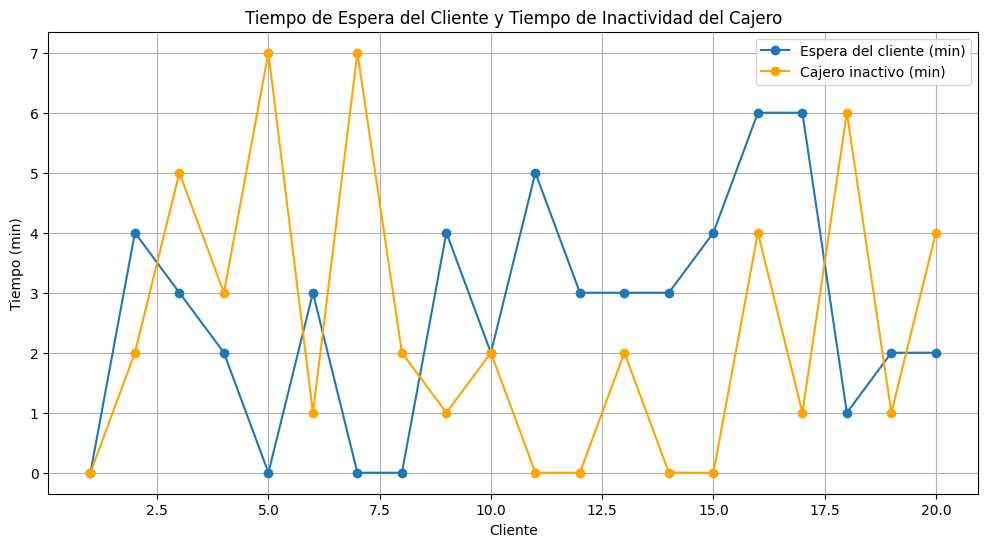

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cliente'], df['Espera del cliente (min)'], marker='o', linestyle='-', label='Espera del cliente (min)')
plt.plot(df['Cliente'], df['Cajero inactivo (min)'], marker='o', linestyle='-', label='Cajero inactivo (min)', color='orange')
plt.title('Tiempo de Espera del Cliente y Tiempo de Inactividad del Cajero')
plt.xlabel('Cliente')
plt.ylabel('Tiempo (min)')
plt.legend()
plt.grid(True)
plt.show()

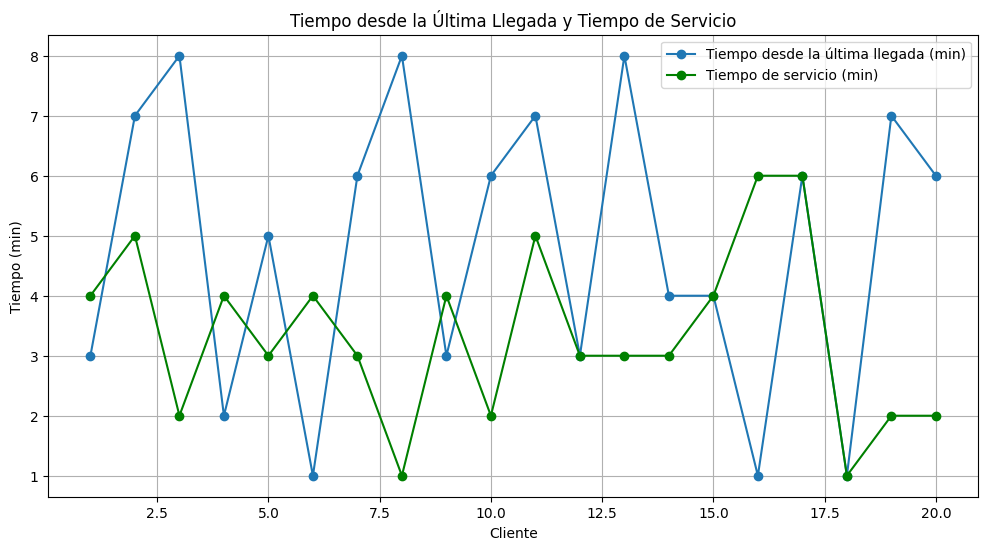

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cliente'], df['Tiempo desde la última llegada (min)'], marker='o', linestyle='-', label='Tiempo desde la última llegada (min)')
plt.plot(df['Cliente'], df['Tiempo de servicio (min)'], marker='o', linestyle='-', label='Tiempo de servicio (min)', color='green')
plt.title('Tiempo desde la Última Llegada y Tiempo de Servicio')
plt.xlabel('Cliente')
plt.ylabel('Tiempo (min)')
plt.legend()
plt.grid(True)
plt.show()

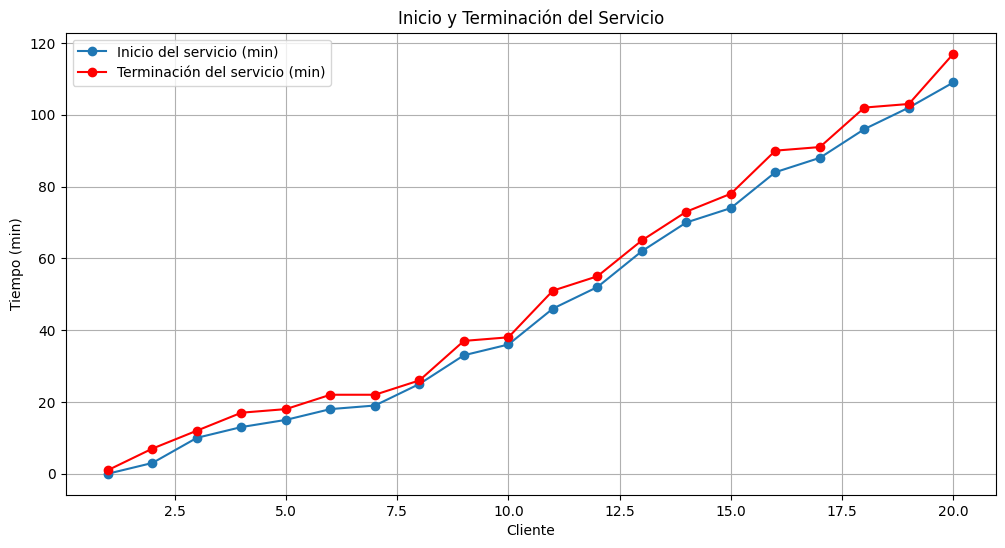

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Cliente'], df['Inicio del servicio (min)'], marker='o', linestyle='-', label='Inicio del servicio (min)')
plt.plot(df['Cliente'], df['Terminación del servicio (min)'], marker='o', linestyle='-', label='Terminación del servicio (min)', color='red')
plt.title('Inicio y Terminación del Servicio')
plt.xlabel('Cliente')
plt.ylabel('Tiempo (min)')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
X = df[['Tiempo desde la última llegada (min)', 'Tiempo de servicio (min)']].values
y = df['Espera del cliente (min)'].values
reg_model = LinearRegression()
reg_model.fit(X, y)
new_data = np.array([[5, 3], [7, 2], [4, 5], [8, 1], [3, 4]])
predicted_wait_times = reg_model.predict(new_data)
predicted_wait_times

array([2.33151783, 1.54147449, 4.16340649, 0.66749716, 3.12156117])